In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

import random
from names_dataset import NameDataset, NameWrapper

from tqdm import tqdm

In [2]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

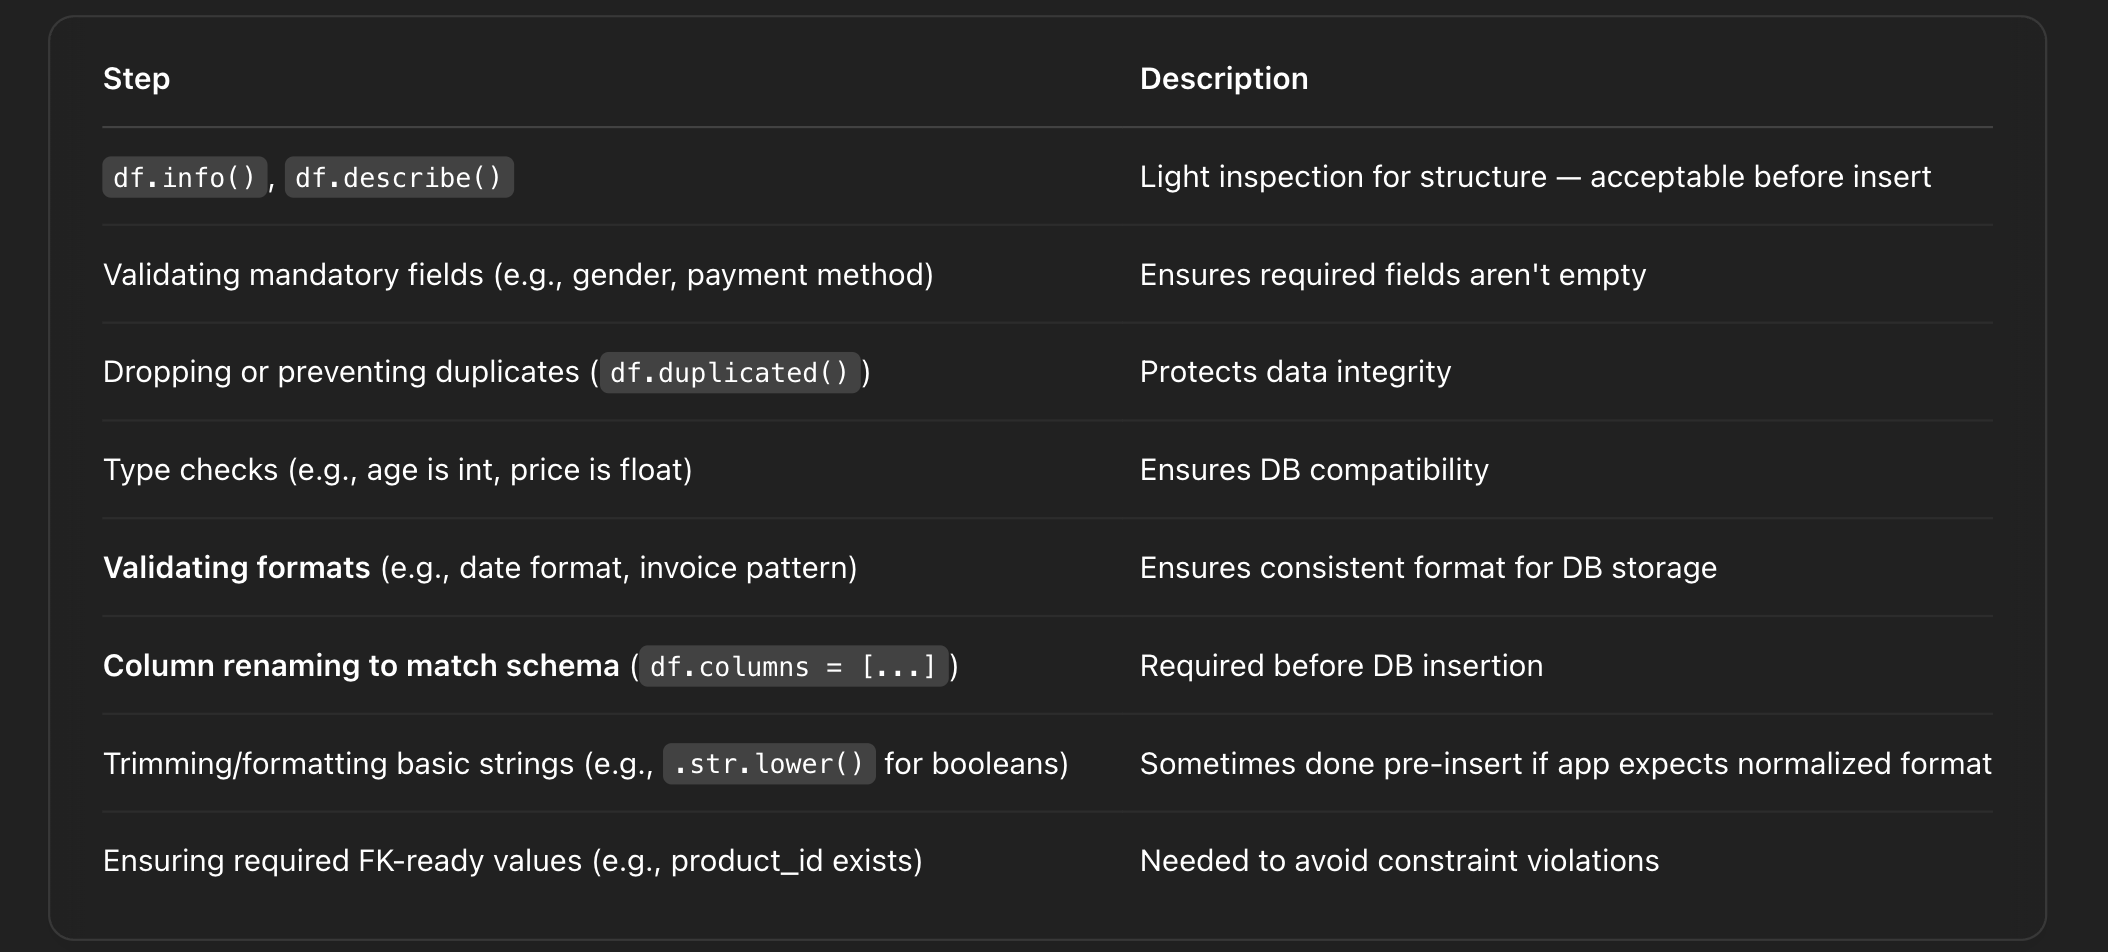

### Data Inspection

In [3]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1419,55,Female,Yes,Smartphone,SKU1001,5,Completed,Credit Card,124.50,20.75,6,2023-09-24,Overnight,"Accessory,Accessory,Accessory",76.59
1,2484,56,Female,No,Smartphone,SKU1004,2,Completed,Paypal,3164.76,791.19,4,2023-09-24,Express,"Impulse Item,Impulse Item,Impulse Item",36.89
2,2933,48,Female,No,Smartwatch,SKU1003,3,Cancelled,Cash,5913.81,844.83,7,2023-09-24,Overnight,"Accessory,Accessory,Accessory",55.92
3,4702,46,Female,No,Smartwatch,SKU1003,3,Cancelled,Paypal,1689.66,844.83,2,2023-09-24,Express,"Extended Warranty,Extended Warranty,Impulse Item",86.55
4,4914,74,Male,No,Smartwatch,SKU1003,3,Completed,Debit Card,3379.32,844.83,4,2023-09-24,Overnight,"Impulse Item,Impulse Item,Extended Warranty",106.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,11809,36,Female,No,Smartwatch,SWT567,2,Cancelled,PayPal,2297.50,459.50,5,2024-09-23,Standard,"Extended Warranty, Extended Warranty, Impulse ...",166.87
19996,2164,29,Female,No,Laptop,SKU1005,3,Completed,Cash,4639.60,463.96,10,2024-09-23,Express,"Extended Warranty,Extended Warranty",69.07
19997,16885,79,Male,No,Smartphone,SMP234,1,Completed,Bank Transfer,6838.08,1139.68,6,2024-09-23,Expedited,Impulse Item,35.93
19998,1038,56,Female,No,Smartphone,SKU1004,2,Completed,Debit Card,5538.33,791.19,7,2024-09-23,Overnight,"Extended Warranty,Accessory",26.01


In [4]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [5]:
df.describe(include = "O")

,Gender,Loyalty Member,Product Type,SKU,Order Status,Payment Method,Purchase Date,Shipping Type,Add-ons Purchased
count,19999,20000,20000,20000,20000,20000,20000,20000,15132
unique,2,2,5,10,2,6,366,5,75
top,Male,No,Smartphone,TBL345,Completed,Credit Card,2024-04-26,Standard,Extended Warranty
freq,10164,15657,5978,2062,13432,5868,88,6725,1701


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

### Missing Values

In [7]:
(df.isna().sum() / df.shape[0]),df.isna().sum()

(Customer ID          0.00000
 Age                  0.00000
 Gender               0.00005
 Loyalty Member       0.00000
 Product Type         0.00000
 SKU                  0.00000
 Rating               0.00000
 Order Status         0.00000
 Payment Method       0.00000
 Total Price          0.00000
 Unit Price           0.00000
 Quantity             0.00000
 Purchase Date        0.00000
 Shipping Type        0.00000
 Add-ons Purchased    0.24340
 Add-on Total         0.00000
 dtype: float64,
 Customer ID             0
 Age                     0
 Gender                  1
 Loyalty Member          0
 Product Type            0
 SKU                     0
 Rating                  0
 Order Status            0
 Payment Method          0
 Total Price             0
 Unit Price              0
 Quantity                0
 Purchase Date           0
 Shipping Type           0
 Add-ons Purchased    4868
 Add-on Total            0
 dtype: int64)

#### Empty strings

In [8]:
empty_string_counts = (df == "").sum()
print(empty_string_counts[empty_string_counts > 0])

Series([], dtype: int64)


In [9]:
df[df["Add-ons Purchased"].isna()]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
8,8729,39,Female,No,Tablet,SKU1002,3,Completed,Debit Card,1729.21,247.03,7,2023-09-24,Standard,NaN,0.0
9,1035,32,Female,No,Smartphone,SKU1001,5,Completed,Cash,186.75,20.75,9,2023-09-24,Standard,NaN,0.0
22,8151,73,Male,No,Smartphone,SKU1001,5,Completed,Paypal,41.50,20.75,2,2023-09-24,Express,NaN,0.0
23,7723,58,Female,Yes,Laptop,SKU1005,3,Cancelled,Credit Card,2319.80,463.96,5,2023-09-24,Overnight,NaN,0.0
33,6917,39,Male,Yes,Tablet,SKU1002,3,Completed,Credit Card,1729.21,247.03,7,2023-09-25,Express,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,19882,22,Male,No,Smartphone,SMP234,3,Completed,Bank Transfer,5698.40,1139.68,5,2024-09-23,Standard,NaN,0.0
19981,7907,32,Female,No,Smartphone,SKU1001,5,Completed,Cash,62.25,20.75,3,2024-09-23,Overnight,NaN,0.0
19983,18070,70,Male,Yes,Laptop,LTP123,2,Cancelled,Bank Transfer,1348.64,674.32,2,2024-09-23,Same Day,NaN,0.0
19985,11269,65,Male,No,Smartphone,SMP234,5,Completed,PayPal,10257.12,1139.68,9,2024-09-23,Standard,NaN,0.0


#### Filling NaN Values

##### Add-ons Purchased

In [10]:
df["Add-ons Purchased"].fillna("none", inplace=True)

/var/folders/2m/qpsmbdfx5lgg4ps0zkpx_v3c0000gn/T/ipykernel_60604/3206598607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Add-ons Purchased"].fillna("none", inplace=True)


##### Gender

In [11]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [12]:
df["Gender"].value_counts()

Gender
Male      10164
Female     9835
Name: count, dtype: int64

In [13]:
df["Gender"].fillna("Female", inplace=True)

/var/folders/2m/qpsmbdfx5lgg4ps0zkpx_v3c0000gn/T/ipykernel_60604/333547179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Female", inplace=True)


## Duplicates

In [14]:
df.duplicated().sum()

0

## Standardizing Data Formats and Column Names / Handling Invalid Data

#### Datetime Data

In [15]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

#### Numerical

In [16]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [17]:
print("Summary:")
print(df[numeric_columns].describe())

print("Negative Values")
(df[numeric_columns] <= 0).sum() 

print("Missing Values")
print(df[numeric_columns].isnull().sum()[df.isnull().sum() > 0])  

print("Columns with Zero Variance:")
zero_variance_cols = df[numeric_columns].var() == 0
print(zero_variance_cols[zero_variance_cols].index.tolist())

Summary:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%        8.000000     93.

- Everything seems in order

#### Modifying Sales Data

In [18]:

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
special_dates = pd.to_datetime([
    '2023-11-24', 
    '2023-11-27',  
    '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
    '2023-12-24', '2023-12-25', '2023-12-26',
    '2024-02-14',
    '2023-11-11'
])


df['is_special'] = df['Purchase Date'].dt.normalize().isin(special_dates)
df['year'] = df['Purchase Date'].dt.year
df['month'] = df['Purchase Date'].dt.month


special_sales = df[df['is_special']]
normal_sales = df[~df['is_special']]

np.random.seed(42)
num_to_duplicate = int(2.0 * len(special_sales))
duplicated_special_sales = special_sales.sample(n=num_to_duplicate, replace=True)
normal_sales_sep_dec = normal_sales[
    (normal_sales['year'] == 2023) & (normal_sales['month'].between(9, 12))
]
normal_sales_other = normal_sales.drop(normal_sales_sep_dec.index)
normal_sales_other_downsampled = normal_sales_other.sample(frac=0.5, random_state=42)

df = pd.concat([
    special_sales,
    duplicated_special_sales,  
    normal_sales_sep_dec,
    normal_sales_other_downsampled
])

df.drop("is_special", axis = 1, inplace= True)
df.drop("year", axis = 1, inplace= True)
df.drop("month", axis = 1, inplace= True)

#### Categorical Data
'Gender','Loyalty Member', 'Product Type','SKU','Order Status','Payment Method', 'Shipping Type','Add-ons Purchased'

In [19]:
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns.to_list()

In [20]:
categorical_columns

['Gender',
 'Loyalty Member',
 'Product Type',
 'SKU',
 'Order Status',
 'Payment Method',
 'Shipping Type',
 'Add-ons Purchased']

In [21]:
for col in categorical_columns[:-1]:
    unique_vals = df[col].unique() 
    print(f"Unique values in column '{col}': {unique_vals}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Loyalty Member': ['Yes' 'No']
Unique values in column 'Product Type': ['Smartphone' 'Smartwatch' 'Laptop' 'Tablet' 'Headphones']
Unique values in column 'SKU': ['SKU1004' 'SKU1003' 'SKU1001' 'SKU1005' 'SKU1002' 'SMP234' 'HDP456'
 'LTP123' 'TBL345' 'SWT567']
Unique values in column 'Order Status': ['Cancelled' 'Completed']
Unique values in column 'Payment Method': ['Paypal' 'Credit Card' 'Debit Card' 'Cash' 'Bank Transfer' 'PayPal']
Unique values in column 'Shipping Type': ['Overnight' 'Express' 'Standard' 'Expedited' 'Same Day']


In [22]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

In [23]:
for col in categorical_columns[:-1]:
    unique_vals = df[col].unique() 
    print(f"Unique values in column '{col}': {unique_vals}")

Unique values in column 'Gender': ['female' 'male']
Unique values in column 'Loyalty Member': ['yes' 'no']
Unique values in column 'Product Type': ['smartphone' 'smartwatch' 'laptop' 'tablet' 'headphones']
Unique values in column 'SKU': ['sku1004' 'sku1003' 'sku1001' 'sku1005' 'sku1002' 'smp234' 'hdp456'
 'ltp123' 'tbl345' 'swt567']
Unique values in column 'Order Status': ['cancelled' 'completed']
Unique values in column 'Payment Method': ['paypal' 'credit card' 'debit card' 'cash' 'bank transfer']
Unique values in column 'Shipping Type': ['overnight' 'express' 'standard' 'expedited' 'same day']


- According to the above list, customers can purchase several additional products along with one main product. (Should be handled)

#### Loyalty Member

In [24]:
df['Loyalty Member'] = df['Loyalty Member'].str.lower().map({'yes': True, 'no': False})

#### Creating Synthetic Columns for a More Realistic Dataset

#### First Name + Last Name

In [25]:
nd = NameDataset()

In [26]:
len(df["Customer ID"].unique())

8445

In [27]:
names = nd.get_top_names(n=df["Customer ID"].unique().shape[0], country_alpha2='US')['US']

list_last_names = [
    key for key in tqdm(list(nd.last_names.keys())) 
    if list(nd.last_names[key]['country'].keys())[0] == "US"
]

names_female_male = names["M"] + names["F"]
random.shuffle(names_female_male)

dict_name_lastname = [
    {"Customer ID": u, "First Name": random.choice(names_female_male), "Last Name": random.choice(list_last_names)}
    for u in tqdm(df["Customer ID"].unique())
]
name_data = pd.DataFrame(dict_name_lastname)

df_modified = pd.merge(df,name_data, on = "Customer ID")



100%|██████████████████████████████████| 8445/8445 [00:00<00:00, 1103351.63it/s]


##### Emails

In [28]:
domains_emails = ["@gmail.com", "@yahoo.com", "@outlook.com"]

email_list = []
count_dict = {}


unique_customers = df_modified.drop_duplicates(subset=["Customer ID"])


for first_name, last_name in zip(unique_customers["First Name"], unique_customers["Last Name"]):
    email =  f"{first_name.lower()}.{last_name.lower()}{random.choice(domains_emails)}"
    if email in count_dict:
        count_dict[email] += 1
        email = f"{first_name.lower()}.{last_name.lower()}_{count_dict[email]}{random.choice(domains_emails)}"
        email_list.append(email)
    else:
        count_dict[email] = 0
        email_list.append(email)


unique_customers["Email"] = email_list

unique_customers = unique_customers[["Customer ID","Email"]]

df_modified = pd.merge(df_modified, unique_customers, on = "Customer ID", )


/var/folders/2m/qpsmbdfx5lgg4ps0zkpx_v3c0000gn/T/ipykernel_60604/393639310.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers["Email"] = email_list


##### Registration Date

In [29]:
df_modified["Purchase Date"] = pd.to_datetime(df_modified["Purchase Date"])

In [30]:
first_order = df_modified[["Customer ID","Purchase Date"]].groupby("Customer ID").min()["Purchase Date"]
random_sub_days  = np.random.randint(15, 80, size=len(first_order))
registration_dates = (first_order - pd.to_timedelta(random_sub_days, unit="D"))
registration_dates.name = "Registration Date"
df_modified = pd.merge(df_modified, registration_dates, on  = "Customer ID")

##### Creating Invoice

#### Invoice

In [31]:
df_modified["Invoice"] = (df_modified.groupby("Purchase Date").cumcount() + 1).astype(dtype = str)
df_modified["Invoice"] = df_modified["Purchase Date"].dt.strftime("%Y%m%d") + df_modified["Invoice"].str.zfill(3)
df_modified["Invoice"]

0        20231111001
1        20231111002
2        20231111003
3        20231111004
4        20231111005
            ...     
12010    20240213033
12011    20240119037
12012    20240318036
12013    20240519037
12014    20240602039
Name: Invoice, Length: 12015, dtype: object

##### Device Type

In [32]:
devices = ['smartphone', 'tablet', 'laptop']
weights = [0.45, 0.35, 0.2]

df_modified['Device Type'] = [random.choices(devices, weights=weights)[0] for _ in range(len(df_modified))]

In [33]:
df_modified.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total', 'First Name', 'Last Name', 'Email', 'Registration Date',
       'Invoice', 'Device Type'],
      dtype='object')

#### Handling Multi Values in Add-ons Purchased

In [34]:
df_modified = df_modified.assign(
    add_on=df_modified["Add-ons Purchased"].str.split(",")).explode("add_on")
df_modified.drop("Add-ons Purchased", axis = 1, inplace=True)

In [35]:
df_modified.drop("add_on",axis = 1).drop_duplicates()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,...,Quantity,Purchase Date,Shipping Type,Add-on Total,First Name,Last Name,Email,Registration Date,Invoice,Device Type
0,8342,80,female,True,smartphone,sku1004,2,cancelled,paypal,1582.38,...,2,2023-11-11,overnight,14.09,Manikandan,Casteriana,manikandan.casteriana@outlook.com,2023-10-12,20231111001,tablet
1,4286,33,male,False,smartwatch,sku1003,3,cancelled,credit card,7603.47,...,9,2023-11-11,overnight,8.89,Savion,Mnikathi,savion.mnikathi@gmail.com,2023-10-15,20231111002,tablet
2,9858,37,male,False,smartphone,sku1001,5,completed,paypal,186.75,...,9,2023-11-11,express,35.17,Gurmeet,Tshivhidzo,gurmeet.tshivhidzo@outlook.com,2023-09-13,20231111003,smartphone
3,7115,37,female,False,smartphone,sku1001,5,completed,paypal,186.75,...,9,2023-11-11,standard,0.00,Tico,Vicknair,tico.vicknair@yahoo.com,2023-09-18,20231111004,smartphone
4,6851,38,male,False,laptop,sku1005,3,completed,debit card,1855.84,...,4,2023-11-11,standard,60.89,Hannibal,Faildes,hannibal.faildes@gmail.com,2023-10-20,20231111005,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,16057,30,male,False,laptop,ltp123,4,completed,paypal,5394.56,...,8,2024-02-13,same day,57.26,Mauro,Muofhe,mauro.muofhe@gmail.com,2023-12-10,20240213033,smartphone
12011,14465,42,male,False,smartwatch,swt567,3,completed,paypal,1838.00,...,4,2024-01-19,same day,0.00,Baljinder,Nogula,baljinder.nogula@outlook.com,2023-11-04,20240119037,smartphone
12012,19488,74,male,False,headphones,hdp456,4,completed,credit card,2167.08,...,6,2024-03-18,standard,176.90,Mitzi,Mashalaba,mitzi.mashalaba@gmail.com,2024-02-29,20240318036,laptop
12013,4349,60,female,False,smartphone,sku1001,5,completed,credit card,207.50,...,10,2024-05-19,overnight,39.23,Jayashree,Aurrecochea,jayashree.aurrecochea@outlook.com,2024-04-18,20240519037,tablet


In [36]:
df_modified["add_on"].unique()

array(['impulse item', 'extended warranty', 'accessory', 'none',
       ' accessory', ' extended warranty', ' impulse item'], dtype=object)

In [37]:
df_modified["add_on"] = df_modified["add_on"].str.strip()

In [38]:

original_dist = df_modified['add_on'].value_counts()


addon_options = ['none', 'accessory', 'impulse item', 'extended warranty']
addon_weights = [0.6, 0.2, 0.15, 0.05] 


np.random.seed(42)
df_modified['add_on'] = np.random.choice(addon_options, size=len(df_modified), p=addon_weights)


#### Creating ID columns

In [39]:
df_modified.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-on Total',
       'First Name', 'Last Name', 'Email', 'Registration Date', 'Invoice',
       'Device Type', 'add_on'],
      dtype='object')

In [40]:
df_modified

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,...,Purchase Date,Shipping Type,Add-on Total,First Name,Last Name,Email,Registration Date,Invoice,Device Type,add_on
0,8342,80,female,True,smartphone,sku1004,2,cancelled,paypal,1582.38,...,2023-11-11,overnight,14.09,Manikandan,Casteriana,manikandan.casteriana@outlook.com,2023-10-12,20231111001,tablet,none
1,4286,33,male,False,smartwatch,sku1003,3,cancelled,credit card,7603.47,...,2023-11-11,overnight,8.89,Savion,Mnikathi,savion.mnikathi@gmail.com,2023-10-15,20231111002,tablet,extended warranty
2,9858,37,male,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,express,35.17,Gurmeet,Tshivhidzo,gurmeet.tshivhidzo@outlook.com,2023-09-13,20231111003,smartphone,accessory
3,7115,37,female,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,standard,0.00,Tico,Vicknair,tico.vicknair@yahoo.com,2023-09-18,20231111004,smartphone,none
4,6851,38,male,False,laptop,sku1005,3,completed,debit card,1855.84,...,2023-11-11,standard,60.89,Hannibal,Faildes,hannibal.faildes@gmail.com,2023-10-20,20231111005,smartphone,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,19488,74,male,False,headphones,hdp456,4,completed,credit card,2167.08,...,2024-03-18,standard,176.90,Mitzi,Mashalaba,mitzi.mashalaba@gmail.com,2024-02-29,20240318036,laptop,none
12013,4349,60,female,False,smartphone,sku1001,5,completed,credit card,207.50,...,2024-05-19,overnight,39.23,Jayashree,Aurrecochea,jayashree.aurrecochea@outlook.com,2024-04-18,20240519037,tablet,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none


### Column Names

In [41]:
df_modified.columns


Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-on Total',
       'First Name', 'Last Name', 'Email', 'Registration Date', 'Invoice',
       'Device Type', 'add_on'],
      dtype='object')

In [42]:
df_modified

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,...,Purchase Date,Shipping Type,Add-on Total,First Name,Last Name,Email,Registration Date,Invoice,Device Type,add_on
0,8342,80,female,True,smartphone,sku1004,2,cancelled,paypal,1582.38,...,2023-11-11,overnight,14.09,Manikandan,Casteriana,manikandan.casteriana@outlook.com,2023-10-12,20231111001,tablet,none
1,4286,33,male,False,smartwatch,sku1003,3,cancelled,credit card,7603.47,...,2023-11-11,overnight,8.89,Savion,Mnikathi,savion.mnikathi@gmail.com,2023-10-15,20231111002,tablet,extended warranty
2,9858,37,male,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,express,35.17,Gurmeet,Tshivhidzo,gurmeet.tshivhidzo@outlook.com,2023-09-13,20231111003,smartphone,accessory
3,7115,37,female,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,standard,0.00,Tico,Vicknair,tico.vicknair@yahoo.com,2023-09-18,20231111004,smartphone,none
4,6851,38,male,False,laptop,sku1005,3,completed,debit card,1855.84,...,2023-11-11,standard,60.89,Hannibal,Faildes,hannibal.faildes@gmail.com,2023-10-20,20231111005,smartphone,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,19488,74,male,False,headphones,hdp456,4,completed,credit card,2167.08,...,2024-03-18,standard,176.90,Mitzi,Mashalaba,mitzi.mashalaba@gmail.com,2024-02-29,20240318036,laptop,none
12013,4349,60,female,False,smartphone,sku1001,5,completed,credit card,207.50,...,2024-05-19,overnight,39.23,Jayashree,Aurrecochea,jayashree.aurrecochea@outlook.com,2024-04-18,20240519037,tablet,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none


In [43]:
df_modified.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-on Total',
       'First Name', 'Last Name', 'Email', 'Registration Date', 'Invoice',
       'Device Type', 'add_on'],
      dtype='object')

In [44]:
database_columns = [
    "customer_id", "age", "gender", "loyalty_member",
    "product_type", "sku", "rating", "order_status", "payment_method",
    "total_price", "unit_price", "quantity", "purchase_date",
    "shipping_type", "addon_total","first_name", "last_name", "email",
    "registration_date","invoice","device_type",'addon_purchased' ] #,'customer_id', 'order_id', 'product_id', 'addon_id' ]
df_modified.columns = database_columns

In [45]:
df_modified

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,...,purchase_date,shipping_type,addon_total,first_name,last_name,email,registration_date,invoice,device_type,addon_purchased
0,8342,80,female,True,smartphone,sku1004,2,cancelled,paypal,1582.38,...,2023-11-11,overnight,14.09,Manikandan,Casteriana,manikandan.casteriana@outlook.com,2023-10-12,20231111001,tablet,none
1,4286,33,male,False,smartwatch,sku1003,3,cancelled,credit card,7603.47,...,2023-11-11,overnight,8.89,Savion,Mnikathi,savion.mnikathi@gmail.com,2023-10-15,20231111002,tablet,extended warranty
2,9858,37,male,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,express,35.17,Gurmeet,Tshivhidzo,gurmeet.tshivhidzo@outlook.com,2023-09-13,20231111003,smartphone,accessory
3,7115,37,female,False,smartphone,sku1001,5,completed,paypal,186.75,...,2023-11-11,standard,0.00,Tico,Vicknair,tico.vicknair@yahoo.com,2023-09-18,20231111004,smartphone,none
4,6851,38,male,False,laptop,sku1005,3,completed,debit card,1855.84,...,2023-11-11,standard,60.89,Hannibal,Faildes,hannibal.faildes@gmail.com,2023-10-20,20231111005,smartphone,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,19488,74,male,False,headphones,hdp456,4,completed,credit card,2167.08,...,2024-03-18,standard,176.90,Mitzi,Mashalaba,mitzi.mashalaba@gmail.com,2024-02-29,20240318036,laptop,none
12013,4349,60,female,False,smartphone,sku1001,5,completed,credit card,207.50,...,2024-05-19,overnight,39.23,Jayashree,Aurrecochea,jayashree.aurrecochea@outlook.com,2024-04-18,20240519037,tablet,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none
12014,15831,62,male,True,laptop,ltp123,4,cancelled,paypal,2022.96,...,2024-06-02,expedited,206.94,Tavo,Nohashe,tavo.nohashe@outlook.com,2023-12-14,20240602039,laptop,none


In [46]:
df_modified.to_csv("cleaned_data.csv")